# Milestone 1 Phase 2
___
___
Nama    : Ali Aufa Fakhri

Batch   : 019

---
---

# 1. Introduction

## Background

Customer churn poses a significant challenge for businesses as it can result in revenue loss and hinder sustainable growth. Companies need to identify customers who are at risk of churning and take appropriate actions to retain them. By analyzing the given dataset, valuable insights can be gained regarding customer characteristics and behaviors that contribute to churn.

## Problem Statement
The objective is to assist a company in predicting customer churn using the provided dataset. By developing a churn prediction model, the company can proactively identify customers likely to discontinue using their products or services. This model will enable the company to implement targeted retention strategies and improve overall customer retention rates.

Minimizing incorrectly predicts that a customer will not churn (negative prediction) when they actually do churn (positive ground truth) is important because it helps businesses take appropriate actions to retain customers who are at risk of churning.

## Dataset
The provided dataset consist of customer information and their churn risk. Here is the description of each columns on the dataset:

| Column | Description |
| --- | --- |
| `user_id` | ID of a customer |
| `age` | Age of a customer |
| `gender` | Gender of a customer |
| `region_category` | Region that a customer belongs to |
| `membership_category` | Category of the membership that a customer is using |
| `joining_date` | Date when a customer became a member |
| `joined_through referral` | Whether a customer joined using any referral code or ID |
| `preferred_offer types` | Type of offer that a customer prefers |
| `medium_of operation` | Medium of operation that a customer uses for transactions |
| `internet_option` | Type of internet service a customer uses |
| `last_visit_time` | The last time a customer visited the website |
| `days_since_last_login` | Number of days since a customer last logged into the website |
| `avg_time_spent` | Average time spent by a customer on the website |
| `avg_transaction_value` | Average transaction value of a customer |
| `avg_frequency_login_days` | Number of times a customer has logged in to the website |
| `points_in_wallet` | Points awarded to a customer on each transaction |
| `used_special_discount` | Whether a customer uses special discounts offered |
| `offer_application_preference` | Whether a customer prefers offers |
| `past_complaint` | Whether a customer has raised any complaints |
| `complaint_status` | Whether the complaints raised by a customer was resolved |
| `feedback` | Feedback provided by a customer |
| `churn_risk_score` | Churn score <br><br> `0` : Not churn <br> `1` : Churn |

---

# 2. Import Library

Library used in this assignment

In [3]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# feature engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler  # data skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

# classification evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import pickle
import json
warnings.filterwarnings('ignore')

---

# 3. Data Loading


In [4]:
# input dataframe
df = pd.read_csv('churn.csv')

## Data shape overview

In [5]:
# setting to view all columns
pd.set_option('display.max_columns', None)

In [6]:
# show first 10 rows
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [7]:
# show last 10 rows
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17:53:32,6,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,21:42:42,3,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,22:03:48,21,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [8]:
# show shape of data
df.shape

(37010, 22)

the data consist of 37010 rows and 22 columns.

## Check the data type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [10]:
# melihat jumlah unique value tiap kolom
df.nunique()

user_id                         36992
age                                55
gender                              2
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             2
preferred_offer_types               3
medium_of_operation                 3
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  24243
avg_transaction_value           36894
avg_frequency_login_days          971
points_in_wallet                23564
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

we need to change some columns data types:
- `joining_date`: It is currently stored as an object (string). It would be beneficial to convert this column to a date or timestamp data type for easier date-related calculations and analysis.

- `last_visit_time`: Similar to joining_date, this column represents time information, it might be useful to convert it to a suitable time or timestamp data type.

In [11]:
# create copy of dataframe
data = df.copy()

In [12]:
# Convert 'joining_date' column to datetime data type
data['joining_date'] = pd.to_datetime(data['joining_date'])

# Convert 'last_visit_time' column to datetime or time data type
data['last_visit_time'] = pd.to_datetime(data['last_visit_time'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       37010 non-null  object        
 1   age                           37010 non-null  int64         
 2   gender                        36951 non-null  object        
 3   region_category               31579 non-null  object        
 4   membership_category           37010 non-null  object        
 5   joining_date                  37010 non-null  datetime64[ns]
 6   joined_through_referral       31568 non-null  object        
 7   preferred_offer_types         36722 non-null  object        
 8   medium_of_operation           31615 non-null  object        
 9   internet_option               37010 non-null  object        
 10  last_visit_time               37010 non-null  datetime64[ns]
 11  days_since_last_login       

In [14]:
data.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,2023-06-06 22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,2023-06-06 15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,2023-06-06 20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,2023-06-06 14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,2023-06-06 04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


## Check Duplicates

In [15]:
# check duplicates
data.duplicated().sum()

18

There are 18 data duplicates.

In [16]:
# drop duplicates
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

we have removed the duplicates

## Check missing value

In [17]:
# cek missing value
data.isna().sum()

user_id                            0
age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

There are missing values in the following columns:
- `gender`
- `region_category`
- `joined_through_referral`
- `preferred_offer_types`
- `medium_of_operation`

We will handle missing values on feature engineering.

---

# 4. Exploratory Data Analysis


## Differentiate between numerical and categorical columsn

In [18]:
print('numerical : ', data.select_dtypes(include=np.number).columns.tolist())
print('cattegorical : ', data.select_dtypes(include=['object']).columns.tolist())

numerical :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']
cattegorical :  ['user_id', 'gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [19]:
# numerical columns
num_cols = ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
#exclude churn_risk_score since it is our target variable and also it's categorical

# categorical columns
cat_cols = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 
            'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
#exclude user_id since it's not useful

## Descriptive Statistics

In [20]:
data[num_cols].describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,279.147450,29271.194003,14.658617,623.562421
std,15.867412,228.819900,329.947709,19444.806226,9.479184,270.263994
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,7.000000,574.135000
50%,37.000000,12.000000,161.765000,27554.485000,14.000000,680.370000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,757.002500
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761


We see that tere is **invalid value** in `days_since_last_login` column which is -999.

In [21]:
data[data['days_since_last_login']< 0]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
56,846e5d098ccea5d0,11,M,Village,Gold Membership,2017-08-01,NaN,Gift Vouchers/Coupons,Smartphone,Mobile_Data,2023-06-06 02:49:31,-999,208.89,11876.12,26.0,666.79000,Yes,No,No,Not Applicable,Poor Product Quality,1
71,93415f6df1dfb2fc,51,F,Town,Basic Membership,2015-12-02,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,2023-06-06 00:00:25,-999,30.76,49293.08,8.0,653.61000,No,Yes,No,Not Applicable,Poor Website,1
90,83f7dd56ba3a0464,52,F,NaN,Basic Membership,2017-04-20,Yes,NaN,Smartphone,Wi-Fi,2023-06-06 23:32:55,-999,68.82,28467.12,0.0,0.00000,Yes,No,No,Not Applicable,Poor Customer Service,1
119,8815dc1a2f57e42e,24,F,City,Basic Membership,2017-07-24,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,2023-06-06 06:37:14,-999,105.40,19189.84,0.0,0.00000,Yes,No,Yes,Solved,Poor Website,1
120,b30748c2a4f4ade9,46,M,City,No Membership,2017-11-13,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,2023-06-06 09:00:13,-999,101.01,27353.61,0.0,372.36373,Yes,No,Yes,Unsolved,No reason specified,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36952,8f0f8a44fe390347,40,M,City,Basic Membership,2016-03-24,No,Without Offers,Desktop,Wi-Fi,2023-06-06 18:53:26,-999,57.77,30897.25,5.0,849.32639,No,Yes,Yes,Unsolved,Poor Product Quality,1
36965,81e8bfde0968fcb4,56,F,City,Premium Membership,2016-02-11,NaN,Gift Vouchers/Coupons,Desktop,Wi-Fi,2023-06-06 04:50:15,-999,191.65,89666.75,4.0,848.73000,Yes,No,No,Not Applicable,Quality Customer Care,0
36973,b48a8082ff2b932e,59,M,Town,Platinum Membership,2015-06-24,Yes,Credit/Debit Card Offers,Smartphone,Fiber_Optic,2023-06-06 02:21:58,-999,32.95,17350.38,10.0,746.45000,Yes,No,No,Not Applicable,Too many ads,0
36999,bb5eb87592709200,52,M,Town,Gold Membership,2017-03-30,Yes,Credit/Debit Card Offers,NaN,Fiber_Optic,2023-06-06 11:47:24,-999,831.49,37021.18,25.0,751.48000,No,Yes,Yes,No Information Available,Poor Website,0


Since there are 1999 rows with that value we will replace them with `NaN` or treat them as missing value for now

In [22]:
# Replace negative values with NaN
data['days_since_last_login'] = data['days_since_last_login'].where(data['days_since_last_login'] >= 0, np.nan)

data[num_cols].describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
count,36992.000000,34993.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,12.758552,279.147450,29271.194003,14.658617,623.562421
std,15.867412,5.572600,329.947709,19444.806226,9.479184,270.263994
min,10.000000,1.000000,0.000000,800.460000,0.000000,0.000000
25%,23.000000,9.000000,60.102500,14177.540000,7.000000,574.135000
50%,37.000000,13.000000,161.765000,27554.485000,14.000000,680.370000
75%,51.000000,17.000000,356.515000,40855.110000,22.000000,757.002500
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761


We have removed the **invalid values**. Now we can see that:
- the average customer age is 37, the value is the same as median
- average days since last login is 13, same as median
- average time spent is 279 minutes, median is 161 minutes. There might be outliers in this column
- average transaction is 29291 and median is 27586. Not that far off
- average frequency login days is 14.6 and median is 14
- average points in wallet is 623 and the median is 680.

In [23]:
data[cat_cols].describe()

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36933,31564,36992,31554,36704,31599,36992,36992,36992,36992,36992,36992
unique,2,3,6,2,3,3,3,2,2,2,5,9
top,F,Town,Basic Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,18490,14128,7724,15839,12349,13913,12413,20342,20440,18602,18602,6350


From the table we can see value with most count on each category, but we will see the visualization below.

## Churn Ratio
See if there is any imbalance from the target data

In [24]:
# query churn count
churn_count = data['churn_risk_score'].value_counts()
churn_count

1    20012
0    16980
Name: churn_risk_score, dtype: int64

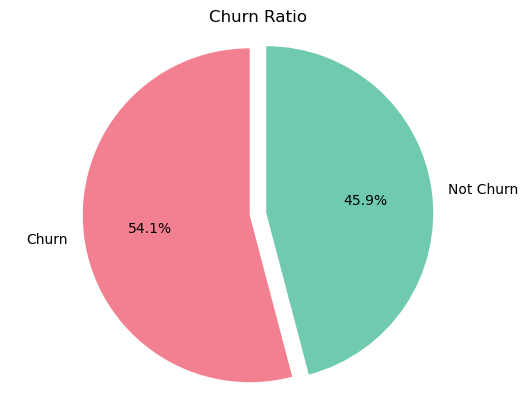

In [25]:
# Plotting pie chart
plt.pie(churn_count, 
        labels=['Churn', 'Not Churn'], startangle=90,
        colors=['#F38091','#70CAb0'],
        autopct='%1.1f%%', explode=[0,0.1])
plt.axis('equal')
plt.title('Churn Ratio')

plt.show()

The data seems balanced between churn and not churn. It seems from the data that customer churn ratio is 54%. Not looking good

## Categorical Data Ratio

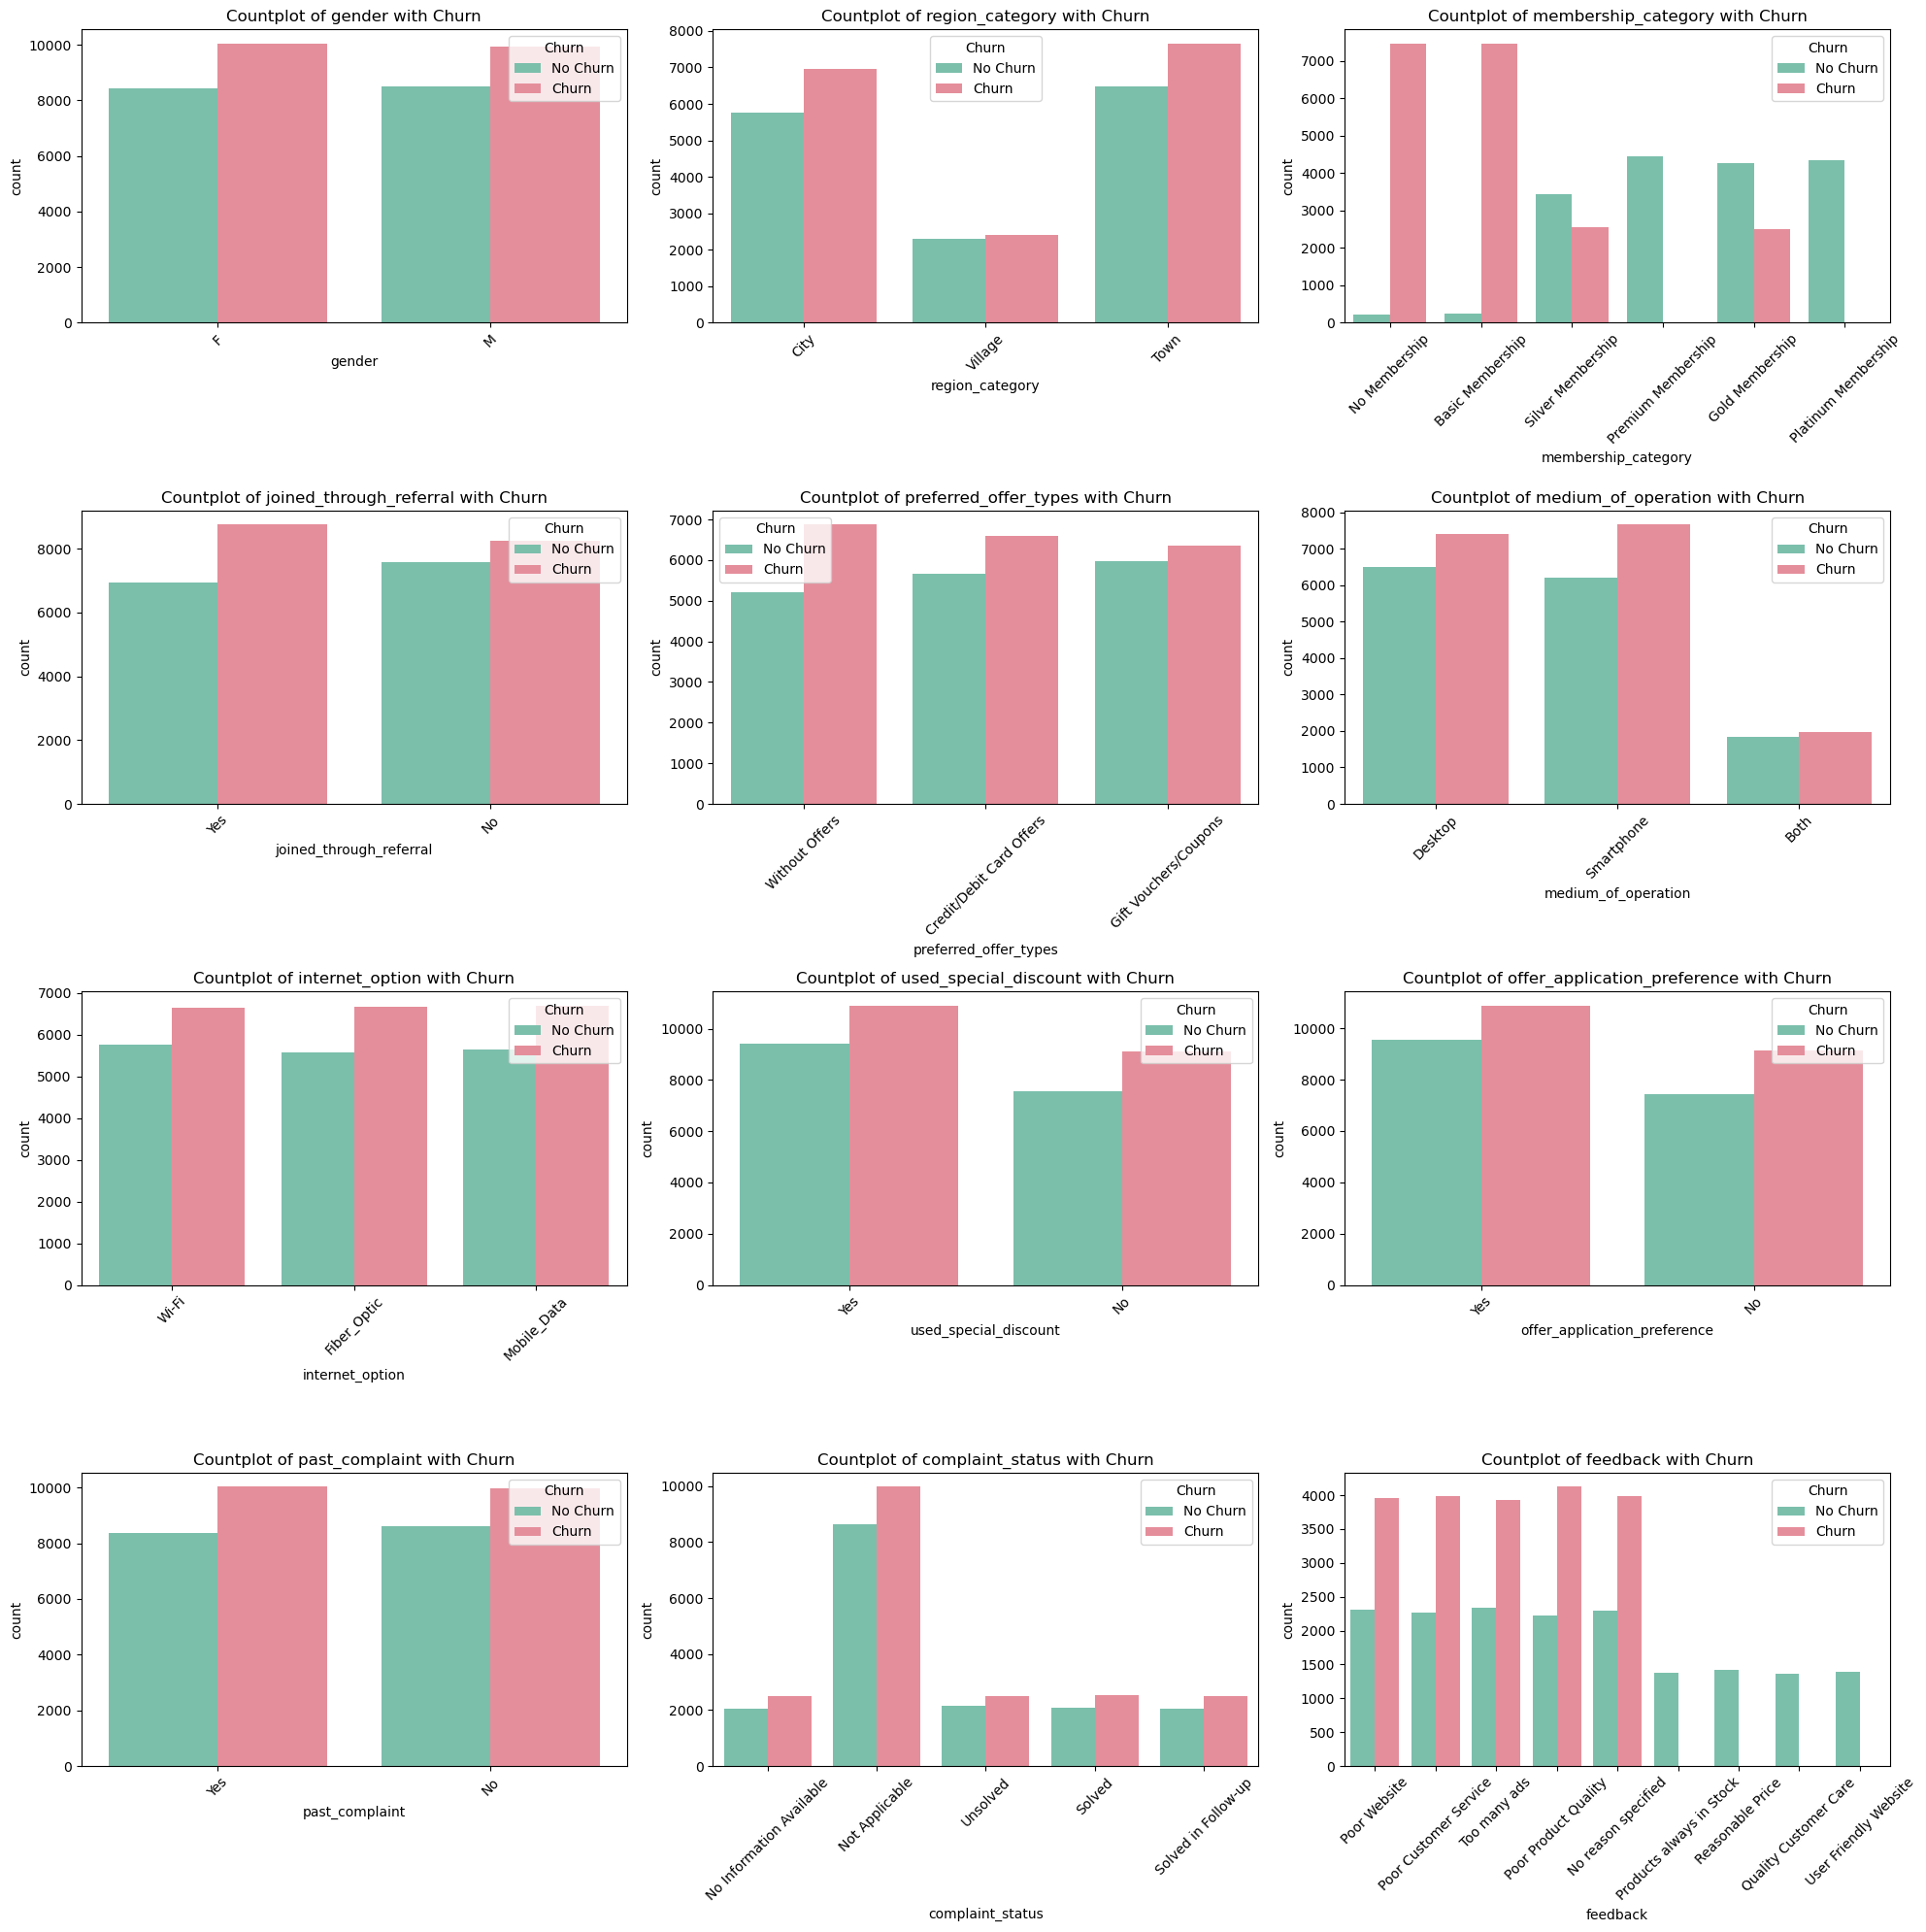

In [26]:
# Create a subplot grid with 3 rows and 4 columns
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
# Create color palette dictionary
color_palette = {0: '#70CAb0', 1: '#F38091'}
# Iterate over categorical columns and create countplots
for i, col in enumerate(cat_cols):
    row = i // 3  # Calculate the row index
    column = i % 3   # Calculate the column index
    sns.countplot(data=data, x=col, hue='churn_risk_score', palette=color_palette, ax=axes[row, column])
    axes[row, column].set_title(f'Countplot of {col} with Churn')
    axes[row, column].set_xticklabels(axes[row, column].get_xticklabels(), rotation=45)
    axes[row, column].legend(title='Churn', labels=['No Churn', 'Churn'])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplot grid
plt.show()

Some insights that can be inferred:

- `Gender Ratio`: The platform has a balanced **female-to-male ratio**, indicating a relatively equal representation of both genders among the customers.

- `Region Category`: Most customers are from the **"Town" region** category, suggesting that the platform is more popular in urban areas compared to villages or cities.

- `Membership Category`: Customers with **"No Membership"** and **"Basic Membership"** are more likely to churn, while those with **"Premium"** and **"Platinum"** memberships show higher retention rates.

- `Referral Program`: Customers who **joined through referrals** have a slightly higher churn rate but the ratio of customers with and without referals are balanced, indicating that referrals are effective for acquiring new customers but not necessarily for long-term retention.

- `Preferred Offer Types`: Customers who **prefer to receive no offers** are more likely to churn, suggesting that targeted offers and incentives might help improve customer retention.

- `Medium of Operation`: Customers using **smartphones** as their medium of operation are slightly more likely to churn compared to desktop users, highlighting the importance of optimizing the mobile user experience.

- `Internet Options`: The churn ratio is similar across different internet options (Wi-Fi, Fiber Optic, and Mobile Data), indicating that the type of internet service used by customers **does not significantly impact churn**.

- `Special Discounts`: Although the churn ratio is similar, a higher number of customers have utilized **special discounts**, implying that offering discounts alone may not be sufficient for customer retention.

- `Offer Application Preference`: Customers who **do not have a preference for offer applications** are more likely to churn, emphasizing the importance of personalized and targeted offer delivery.

- `Past Complaints`: The churn ratio is similar for customers with and without past complaints, but those **with past complaints** have a slightly higher likelihood of churning, indicating that addressing customer concerns and grievances is essential for retention.

- `Complaint Status`: Customers who complain about **"Not Applicable" issues** are more likely to churn, suggesting that unresolved or unsatisfactory complaints contribute to customer attrition.

- `Feedback`: Customers who provide positive feedback are less likely to churn, while those who leave **negative feedback** have a higher churn risk. This highlights the significance of addressing customer dissatisfaction and utilizing feedback to enhance the customer experience.


## Numeric data distribution

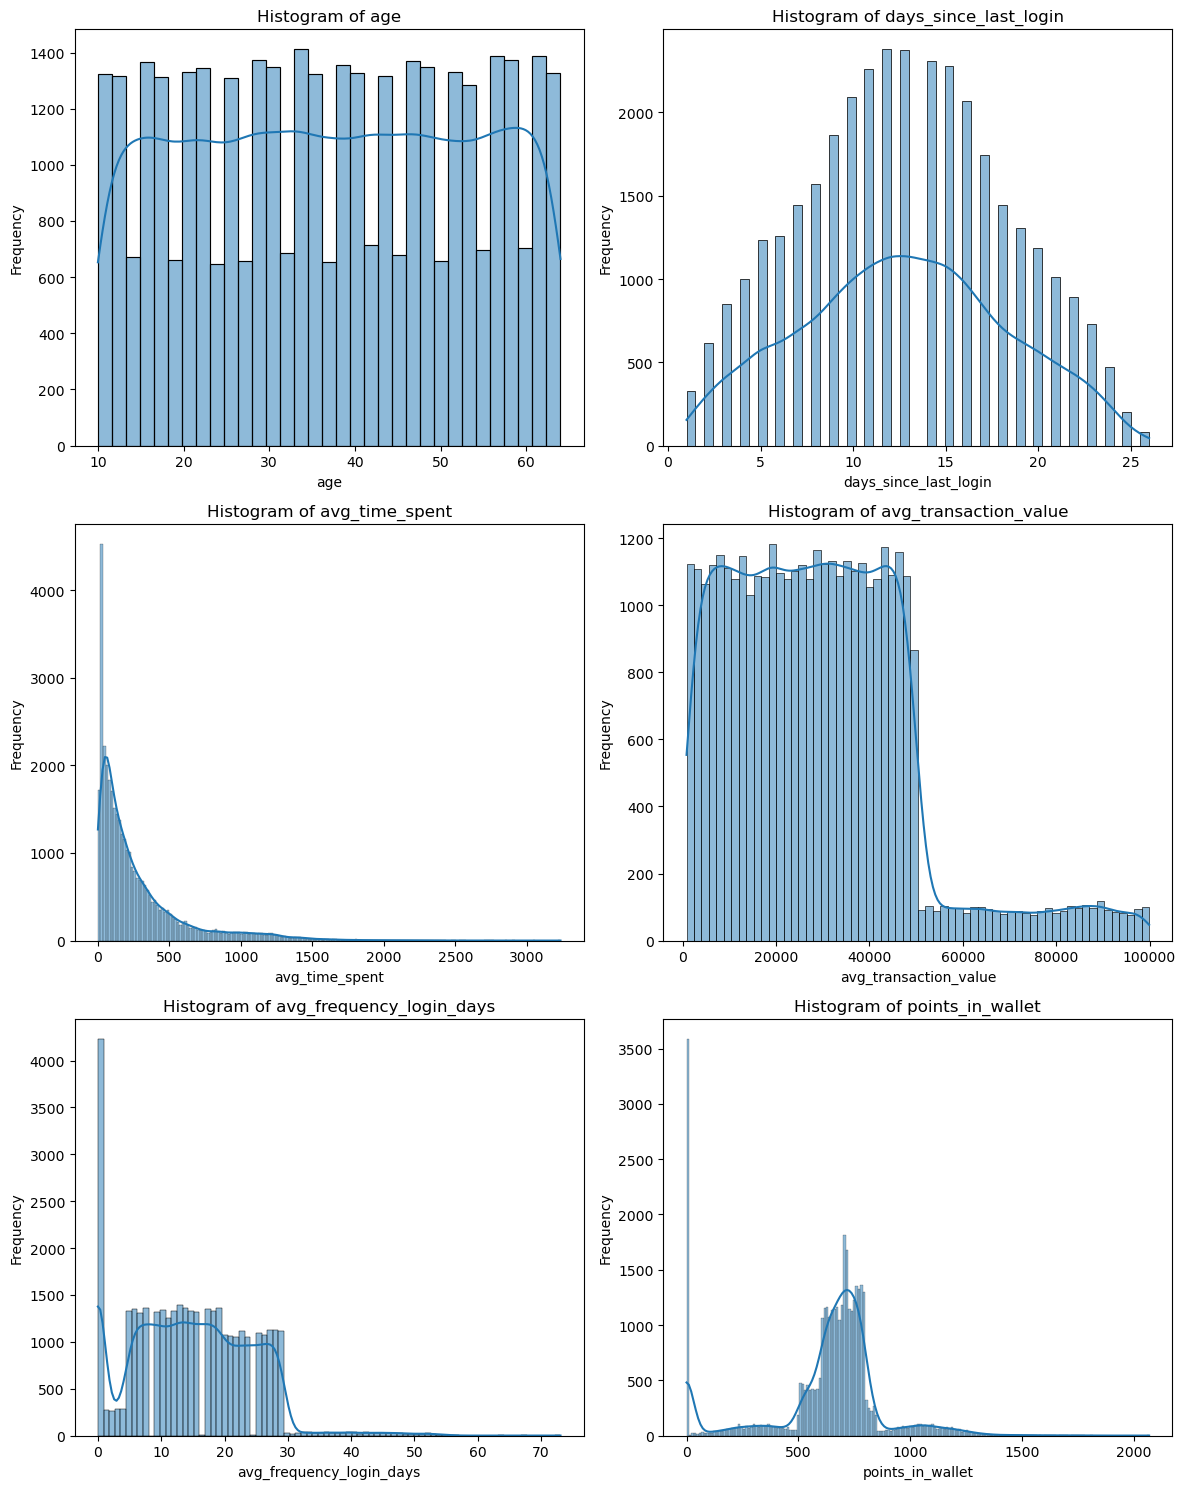

In [27]:
# Create a subplot grid with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Iterate over numerical columns and create histplots
for i, col in enumerate(num_cols):
    row = i // 2  # Calculate the row index
    column = i % 2   # Calculate the column index
    sns.histplot(data=data, x=col, kde=True, ax=axes[row, column])
    axes[row, column].set_title(f'Histogram of {col}')
    axes[row, column].set_xlabel(col)
    axes[row, column].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplot grid
plt.show()

From the distribution we can infer:
- Age is equally distributed over the customers, the range of customer's age is between 10 to 70
- Days since last login also equally distributed with range between 1 to 26 days. 
- Average time spent, average transaction value and average frequency login days are right skewed
- Most customer spent less than 50000 in transaction
- Most customer have between 600 to 800 points in their wallet. The distribution looks normal with outliers.

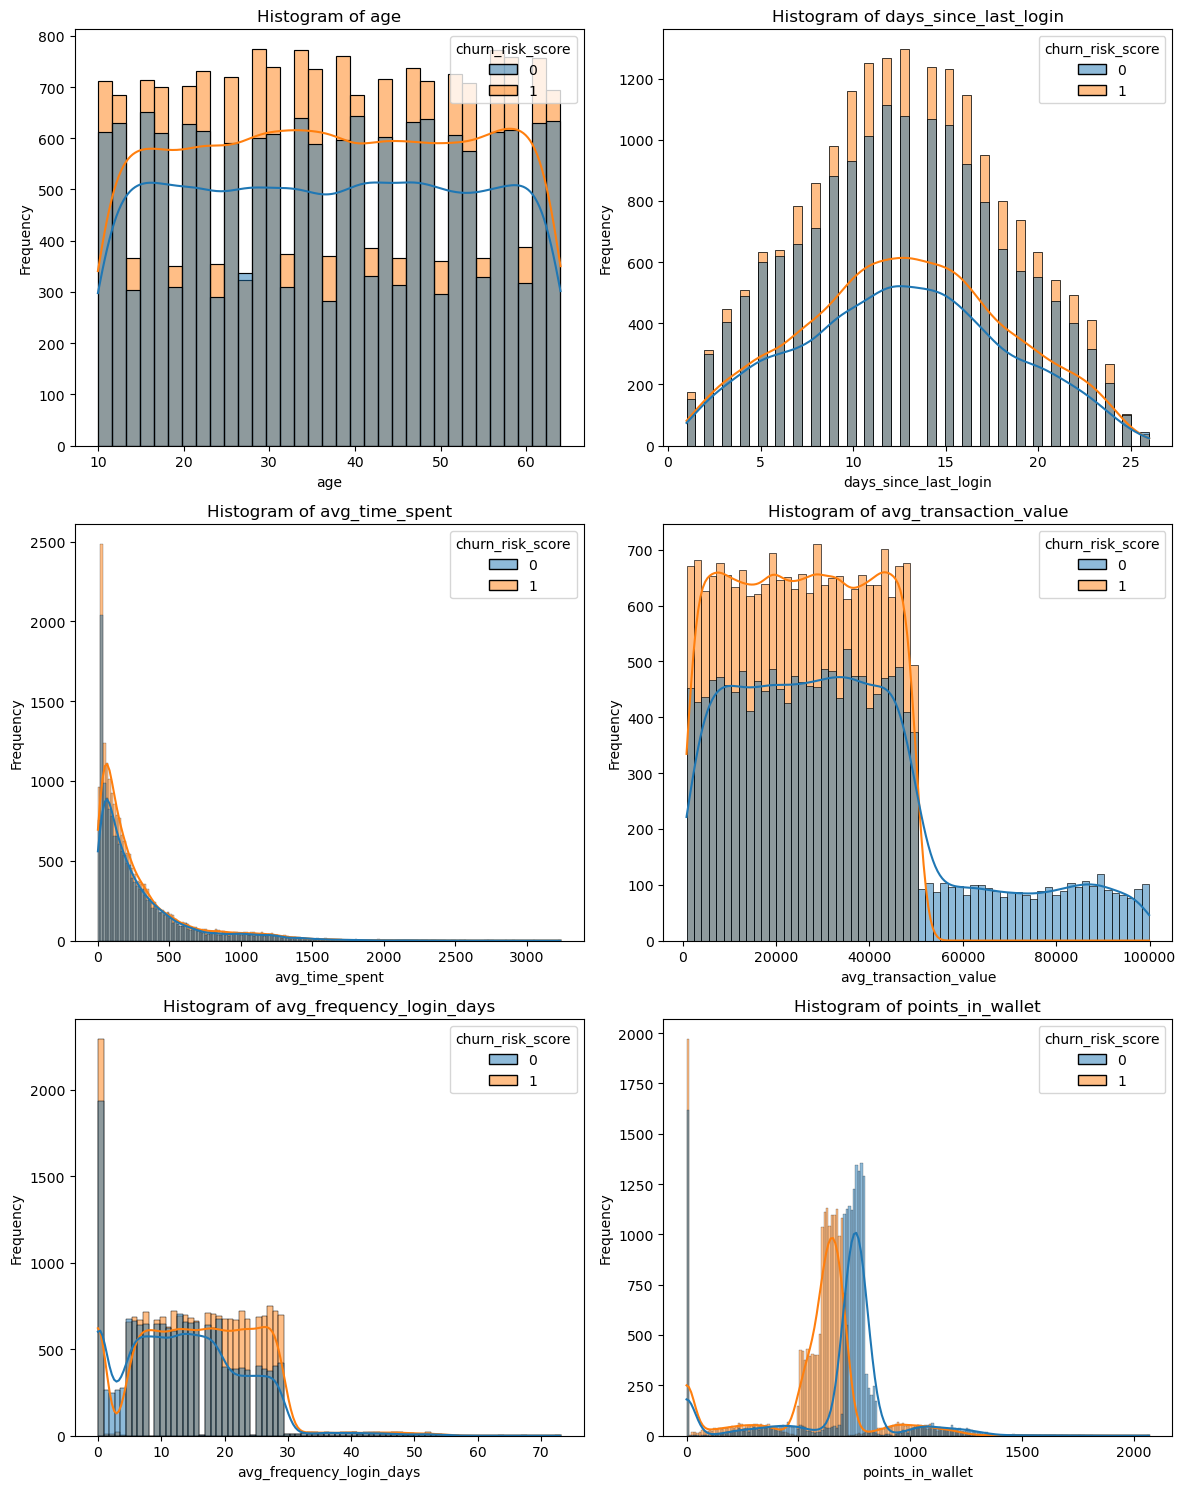

In [28]:
# Create a subplot grid with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
# Iterate over numerical columns and create histogram plots with hue
for i, col in enumerate(num_cols):
    row = i // 2  # Calculate the row index
    column = i % 2   # Calculate the column index
    sns.histplot(data=data, x=col, hue='churn_risk_score', kde=True, ax=axes[row, column])
    axes[row, column].set_title(f'Histogram of {col}')
    axes[row, column].set_xlabel(col)
    axes[row, column].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplot grid
plt.show()

With curn as hue we can see that:
- `Transaction Value`: Customers who have spent less than 50,000 in transactions are more likely to churn, whereas those who have spent more than 50,000 show higher retention rates. This suggests that higher transaction values might be associated with greater customer loyalty.
- `Points in Wallet`: Customers with fewer than 700 points in their wallet are significantly more likely to churn. This implies that customers with lower point balances might be less engaged or satisfied with the platform.

The company can focus on improving customer engagement and satisfaction, as well as developing strategies to increase transaction values and point accumulations to reduce churn rates.

---

# 5. Feature Engineering

In [29]:
# create data copy for feature engineering
data2 = data.copy()

## Drop non-needed features

Some features we considers not needed for the models are:
- `user_id` : only shows unique key of each customer
- `joining_date` : we will not use datetime features.
- `last_visit_time` : only represent exact hour that the customer last visits. We already have `days_since_last_login`.

In [30]:
non_needed_features = ['user_id', 'joining_date', 'last_visit_time']
data2 = data2.drop(non_needed_features, axis=1)

## Split feature `X` and target `y`

In [31]:
#split Fitur dan target
X= data2.drop(['churn_risk_score'], axis=1)
y= data2['churn_risk_score']

## Split dataset Train, Validation, and Test

The dataset is separated into a train and validation dataset for model training, and a test dataset for model testing. Separation is done with a ratio of 85% train-validation and 15% test.

In [32]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=20, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=20, stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (26726, 18)
Val Size :  (4717, 18)
Test Size :  (5549, 18)


## Handling missing values

In [33]:
# Check Missing Values on X_train

X_train.isnull().sum()

age                                0
gender                            41
region_category                 3890
membership_category                0
joined_through_referral         3967
preferred_offer_types            204
medium_of_operation             3914
internet_option                    0
days_since_last_login           1457
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [34]:
# Check Missing Values on X_val

X_val.isnull().sum()

age                               0
gender                            8
region_category                 709
membership_category               0
joined_through_referral         666
preferred_offer_types            27
medium_of_operation             703
internet_option                   0
days_since_last_login           254
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [35]:
# Check Missing Values on X_test

X_test.isnull().sum()

age                               0
gender                           10
region_category                 829
membership_category               0
joined_through_referral         805
preferred_offer_types            57
medium_of_operation             776
internet_option                   0
days_since_last_login           288
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

There are missing values on column `region_category`, `joined_through_referral`, `preferred_offer_types`, `medium_of_operation`, and `days_since_last_login`.

For missing values in numerical column will be handled by imputing with median, and in categorical column will be imputed with most frequent value on each column.

## Handling Outlier

In [36]:
print(num_cols)

['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']


### Check percentage of outlier

In [37]:
# IQR
q1 = X_train[num_cols].quantile(0.25)
q3 = X_train[num_cols].quantile(0.75)
iqr = q3 - q1

# lower dan upper limit
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

# menghitung persentase outlier
outlier_percentages = ((X_train[num_cols] < lower_threshold) | (X_train[num_cols] > upper_threshold)).mean() * 100

print('outlier percentage:')
print(outlier_percentages)

outlier percentage:
age                          0.000000
days_since_last_login        0.000000
avg_time_spent               8.516052
avg_transaction_value        3.034498
avg_frequency_login_days     0.707177
points_in_wallet            18.233181
dtype: float64


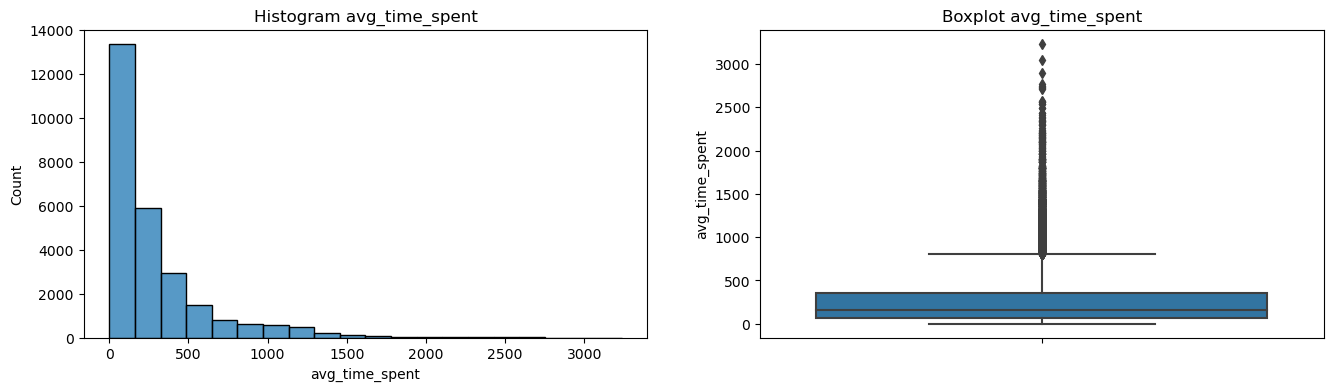

In [38]:
plt.figure(figsize=(16, 4))

 # Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['avg_time_spent'], bins=20)
plt.title('Histogram avg_time_spent')

    # Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['avg_time_spent'])
plt.title('Boxplot avg_time_spent')

plt.show()

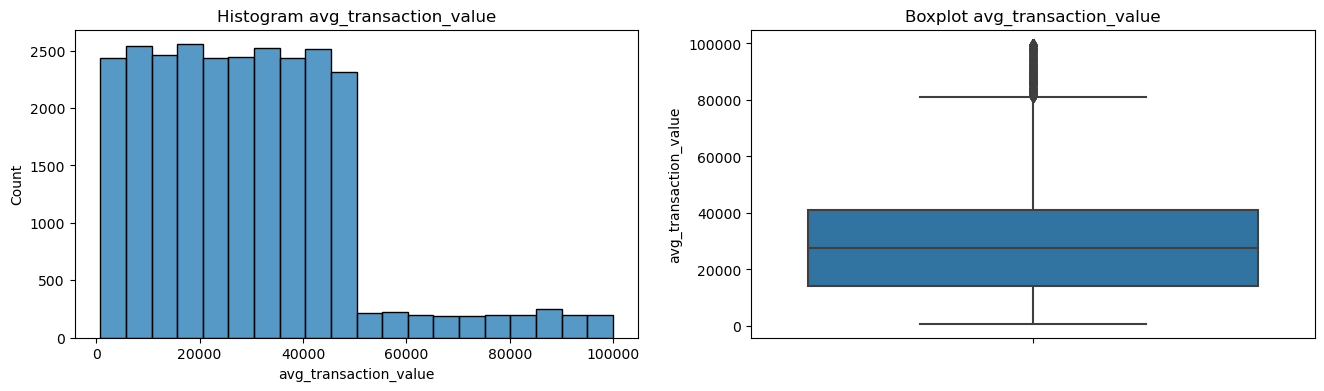

In [39]:
plt.figure(figsize=(16, 4))

 # Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['avg_transaction_value'], bins=20)
plt.title('Histogram avg_transaction_value')

    # Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['avg_transaction_value'])
plt.title('Boxplot avg_transaction_value')

plt.show()

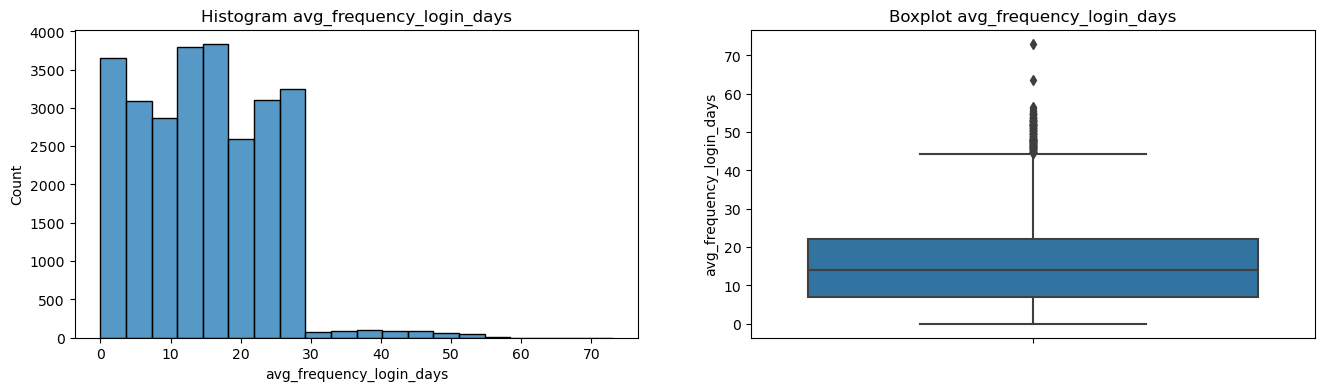

In [40]:
plt.figure(figsize=(16, 4))

 # Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['avg_frequency_login_days'], bins=20)
plt.title('Histogram avg_frequency_login_days')

    # Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['avg_frequency_login_days'])
plt.title('Boxplot avg_frequency_login_days')

plt.show()

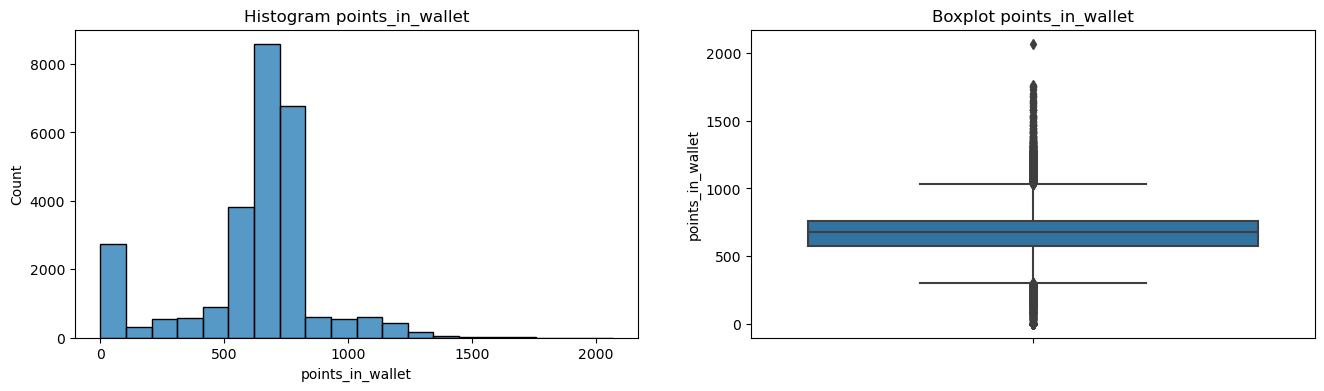

In [41]:
plt.figure(figsize=(16, 4))

 # Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['points_in_wallet'], bins=20)
plt.title('Histogram points_in_wallet')

    # Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['points_in_wallet'])
plt.title('Boxplot points_in_wallet')

plt.show()

We will handle outliers by winzorizing with iqr capping method since the distribution of features with missing values are not notmal.

## Split numeric and categorical features
Numerical and categorical features has different ways of preprocessing, so we split them

In [42]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Categorical Columns :  ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


## Feature Scaling
We will scale numeric features with minmaxscaler since most numeric features are not normally distributed

## Feature Encoding
We will encode ordinal categorical features with ordinal encoder and for nominal we will use One hot encoder. First we need to differentiate which are ordinal and nominal.

In [43]:
cat_columns_ord = ['membership_category']
cat_columns_nom = ['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 
                    'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 
                    'past_complaint', 'complaint_status', 'feedback']

## Feature Selection

In this section the features that affect the target categorization will be selected. The feature selection technique used is chi-square for categorical features and ANOVA for numerical features. These two features were chosen because the target to be searched for is categorical data.

For chi-square tests, a p-value less than 0.05 indicates that there is a significant association between the categorical variables being compared. In this case, a p-value below 0.05 suggests that the variables are not independent and may be considered important in relation to each other.

For ANOVA (Analysis of Variance) tests, a p-value less than 0.05 suggests that there is a significant difference between the means of the groups being compared. In this case, a p-value below 0.05 indicates that there is evidence of a statistically significant difference among the groups, and the factor being tested may be considered important in explaining the variation in the dependent variable.

In [44]:
# Store the original numerical feature names
original_numerical_features = ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']

# Store the original categorical feature names
original_categorical_features = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 
                                 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']

In [45]:
# Select categorical features
X_train_categorical = pd.DataFrame(X_train).drop(num_columns, axis=1).values
X_train_categorical = SimpleImputer(strategy='most_frequent').fit_transform(X_train_categorical)
X_train_cat_encoded = OrdinalEncoder().fit_transform(X_train_categorical)
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded)

# Select numerical features
X_train_numerical = X_train[num_columns]
X_train_numerical = SimpleImputer(strategy='median').fit_transform(X_train_numerical)
X_train_num_scaled = MinMaxScaler().fit_transform(X_train_numerical)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled)

# Apply feature selection to categorical features using chi-square
selector_categorical = SelectKBest(score_func=chi2, k='all')
selector_categorical.fit(X_train_cat_encoded, y_train)

df_scores_categorical = pd.DataFrame({'Feature': X_train_cat_encoded.columns,
                                      'Score': selector_categorical.scores_,
                                      'p-value': selector_categorical.pvalues_.round(4)})

df_scores_categorical = df_scores_categorical.sort_values(by='Score', ascending=False)
# Replace the categorical feature names in df_scores_categorical
df_scores_categorical['Feature'] = cat_columns

# Apply feature selection to numerical features using ANOVA F-value
selector_numerical = SelectKBest(score_func=f_classif, k='all')
selector_numerical.fit(X_train_num_scaled, y_train)

df_scores_numerical = pd.DataFrame({'Feature': X_train_num_scaled.columns,
                                    'Score': selector_numerical.scores_,
                                    'p-value': selector_numerical.pvalues_.round(4)})

df_scores_numerical = df_scores_numerical.sort_values(by='Score', ascending=False)
# Replace the numerical feature names in df_scores_numerical
df_scores_numerical['Feature'] = num_columns

# Merge the results
df_scores = pd.concat([df_scores_categorical, df_scores_numerical], ignore_index=True)

df_scores

,Feature,Score,p-value
0,gender,7514.639535,0.0000
1,region_category,2482.823894,0.0000
2,membership_category,12.149891,0.0005
3,joined_through_referral,11.269606,0.0008
4,preferred_offer_types,7.374556,0.0066
5,medium_of_operation,5.974980,0.0145
6,internet_option,3.831015,0.0503
7,used_special_discount,1.942176,0.1634
8,offer_application_preference,1.887208,0.1695
9,past_complaint,0.410789,0.5216


From the table (chi-square and ANOVA), features that have a p-value of <0.05 are considered important, but we have tried using only important features and the results are unsatisfactory. **We will use all of the features instead**.



## Pipeline
What we will do for preprocessing:
1. impute numeric missing values with median
2. winsorize outliers with iqr capping method
3. Scaling numeric features with Minmax scaler

4. Encoding ordinal categorical features with ordinal encoder
5. Impute categorical missing values with most frequent values.
6. Encode nominal categorical features with one hot encoder.

We will build preprocessing pipeline that do the things above

In [46]:
# Numeric columns pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('winsorizer', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
    ('scaler', MinMaxScaler())
])

# Categorical ordinal columns pipeline
cat_ord_pipeline = Pipeline([
    ('encoder', OrdinalEncoder(categories=[["No Membership", "Basic Membership", "Silver Membership", 
                                            "Gold Membership","Premium Membership","Platinum Membership"]]))
])

# Categorical nominal columns pipeline
cat_nom_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_columns),
        ('cat_ord', cat_ord_pipeline, cat_columns_ord),
        ('cat_nom', cat_nom_pipeline, cat_columns_nom)
    ]
)

In [47]:
# Fit and Transform

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)
X_train.shape

(26726, 43)

In [46]:
X_train

array([[0.72222222, 0.64      , 0.08769434, ..., 0.        , 0.        ,
        0.        ],
       [0.38888889, 0.92      , 0.04129218, ..., 0.        , 0.        ,
        0.        ],
       [0.55555556, 0.4       , 0.12166512, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.48148148, 0.44      , 0.10578543, ..., 1.        , 0.        ,
        0.        ],
       [0.7962963 , 0.44      , 0.20151332, ..., 0.        , 0.        ,
        0.        ],
       [0.40740741, 0.84      , 0.22841258, ..., 0.        , 0.        ,
        0.        ]])

---

# 6. Model Definition

In [47]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Tensorflow Pipeline

In [48]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(32)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(32)

## Model Sequential
The sequential model will have 3 hidden layers with ReLU activation method and the He normal initializer for the kernel weights. The output will be activated with sigmoid for binary classification. The model is compiled with the binary cross-entropy loss function, the Adam optimizer, and accuracy as the evaluation metric.

In [49]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(30, 
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(X_train.shape[1],))) # Hidden Layer 1
model_sequential.add(Dense(20,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_sequential.add(Dense(10,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 3
model_sequential.add(Dense(1, 
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1320      
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________


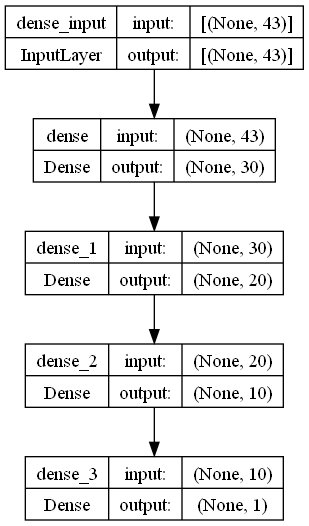

In [50]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

# Model Functional
The functional model will have an input layer, three hidden layers, and an output layer. The input layer takes the shape of the input data. The hidden layers use the ReLU activation function and the He normal initializer for the kernel weights. The output layer uses the sigmoid activation function for binary classification. The model is compiled with the binary cross-entropy loss function, the Adam optimizer, and accuracy as the evaluation metric.

In [51]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [52]:
# Create Functional Model

input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(30, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(20, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)
hidden_layer_3 = Dense(10, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_2)
concat_layer = concatenate([input_layer, hidden_layer_3])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           1320        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 20)           620         ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 10)           210         ['dense_1[0][0]']                
                                                                                              

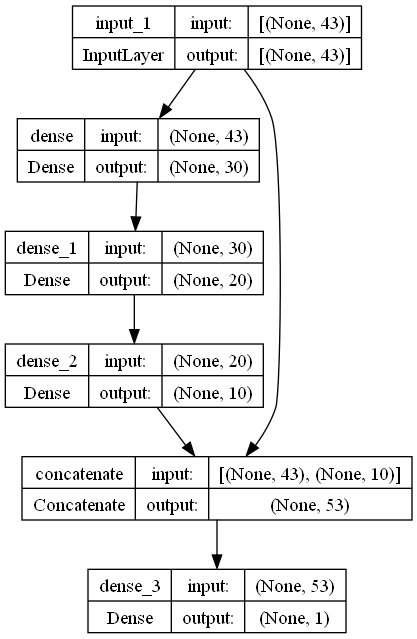

In [53]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

---

# 7. Model Training

In [54]:
# define earlystopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

Callback early stopping monitors the performance of a model on a validation dataset during training and stops the training process when the model's performance on the validation set starts to deteriorate.

## Model Sequential

In [55]:
# Train the Model

%time
history_seq = model_sequential.fit(train_pipe,
                                   epochs=150,
                                   validation_data=(val_pipe),
                                   callbacks=callback)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/150
836/836 [==============================] - 6s 4ms/step - loss: 0.3301 - accuracy: 0.8386 - val_loss: 0.2969 - val_accuracy: 0.8463
Epoch 2/150
836/836 [==============================] - 2s 3ms/step - loss: 0.2877 - accuracy: 0.8474 - val_loss: 0.2888 - val_accuracy: 0.8469
Epoch 3/150
836/836 [==============================] - 2s 3ms/step - loss: 0.2803 - accuracy: 0.8478 - val_loss: 0.2789 - val_accuracy: 0.8488
Epoch 4/150
836/836 [==============================] - 2s 3ms/step - loss: 0.2690 - accuracy: 0.8508 - val_loss: 0.2662 - val_accuracy: 0.8575
Epoch 5/150
836/836 [==============================] - 2s 3ms/step - loss: 0.2584 - accuracy: 0.8623 - val_loss: 0.2557 - val_accuracy: 0.8677
Epoch 6/150
836/836 [==============================] - 2s 3ms/step - loss: 0.2539 - accuracy: 0.8699 - val_loss: 0.2543 - val_accuracy: 0.8675
Epoch 7/150
836/836 [==============================] - 2s 3ms/step - loss: 0.2528 - accuracy: 0.8696 - 

In [56]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df.tail()

,loss,accuracy,val_loss,val_accuracy
27,0.167037,0.927037,0.180979,0.921772
28,0.166150,0.927000,0.181188,0.921772
29,0.165321,0.928085,0.181171,0.922408
30,0.164364,0.928422,0.181433,0.924316
31,0.163746,0.928310,0.181260,0.922832


<Axes: >

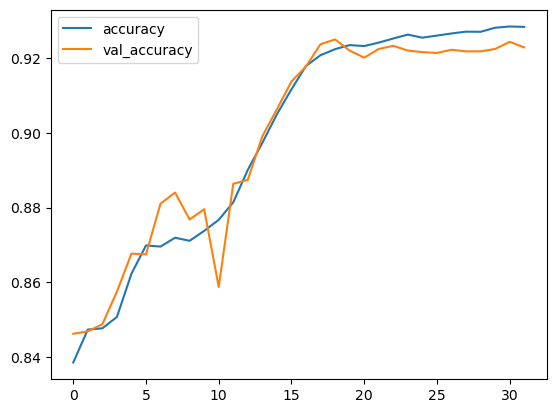

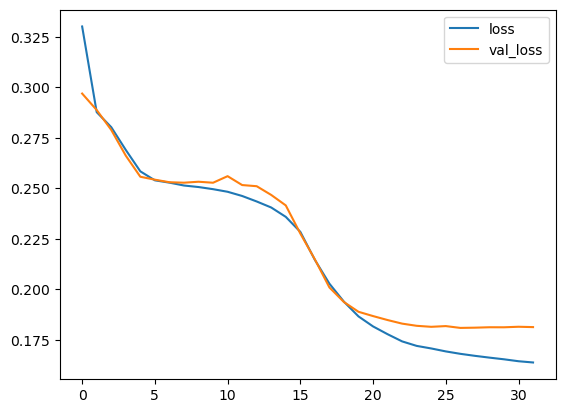

In [57]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

There is exploding gradient in the model, we will try to improve the model by adding batch normalization and dropout layer.

## Sequential improvement

In [58]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In this part the sequential model will be improved by adding batch normalization to get rid of exploding gradient, and dropout to potentially reduce overfitting. We will also reduce the hidden layer to simplify the model

In [59]:
# Create Sequential API

model_sequential_2 = Sequential()
model_sequential_2.add(Dense(30, 
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(X_train.shape[1],))) # Hidden Layer 1
model_sequential_2.add(tf.keras.layers.BatchNormalization())
model_sequential_2.add(tf.keras.layers.Dropout(0.1))

model_sequential_2.add(Dense(20,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_sequential_2.add(tf.keras.layers.BatchNormalization())
model_sequential_2.add(tf.keras.layers.Dropout(0.1))


model_sequential_2.add(Dense(1, 
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile
model_sequential_2.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_sequential_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1320      
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 20)                0

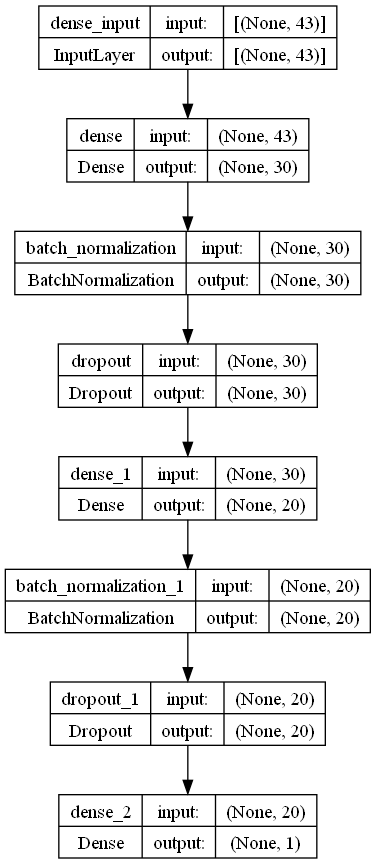

In [60]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential_2, show_shapes=True)

In [61]:
# Train the Model

%time
history_seq_2 = model_sequential_2.fit(train_pipe,
                                   epochs=150,
                                   validation_data=(val_pipe),
                                   callbacks=callback)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/150
836/836 [==============================] - 15s 4ms/step - loss: 0.3833 - accuracy: 0.8250 - val_loss: 0.3066 - val_accuracy: 0.8459
Epoch 2/150
836/836 [==============================] - 3s 3ms/step - loss: 0.3216 - accuracy: 0.8495 - val_loss: 0.2923 - val_accuracy: 0.8455
Epoch 3/150
836/836 [==============================] - 3s 4ms/step - loss: 0.3107 - accuracy: 0.8512 - val_loss: 0.2829 - val_accuracy: 0.8448
Epoch 4/150
836/836 [==============================] - 3s 4ms/step - loss: 0.3027 - accuracy: 0.8513 - val_loss: 0.2772 - val_accuracy: 0.8465
Epoch 5/150
836/836 [==============================] - 3s 4ms/step - loss: 0.2988 - accuracy: 0.8516 - val_loss: 0.2734 - val_accuracy: 0.8486
Epoch 6/150
836/836 [==============================] - 3s 4ms/step - loss: 0.2937 - accuracy: 0.8517 - val_loss: 0.2697 - val_accuracy: 0.8516
Epoch 7/150
836/836 [==============================] - 3s 4ms/step - loss: 0.2904 - accuracy: 0.8540 -

In [62]:
# Create DataFrame

history_seq_2_df = pd.DataFrame(history_seq_2.history)
history_seq_2_df.tail()

,loss,accuracy,val_loss,val_accuracy
37,0.199769,0.920340,0.181231,0.923256
38,0.199716,0.920115,0.177072,0.925164
39,0.199221,0.921425,0.180195,0.924528
40,0.197147,0.920415,0.182158,0.924952
41,0.198992,0.920377,0.174719,0.928980


<Axes: >

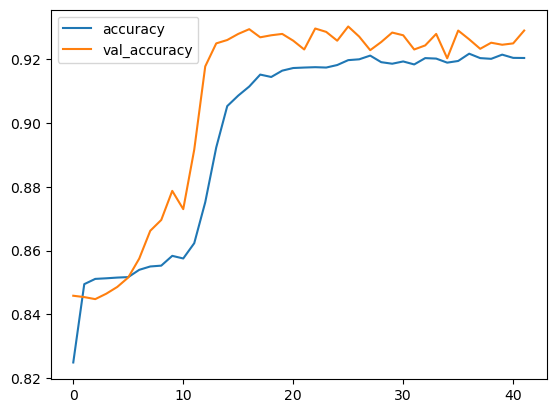

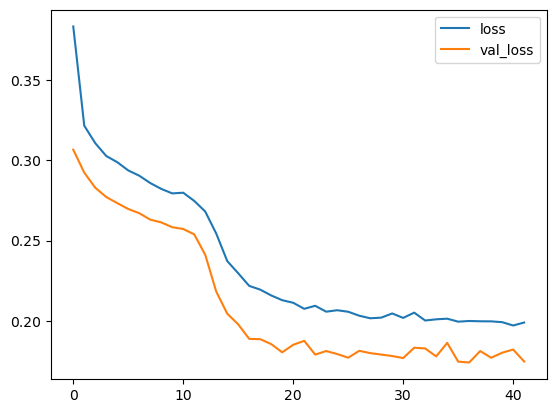

In [63]:
# Plot Training Results

history_seq_2_df[['accuracy', 'val_accuracy']].plot()
history_seq_2_df[['loss', 'val_loss']].plot()

We have **gotten rid of the exploding**, and from the plot we can see that the model on validation set is getting further apart from test set compared to previous model but still can be considered **good fit**. The validation **accuracy** also seems to be **improved by a very small margin**.

## Model Functional

In [64]:
# Train the Model

%time
history_func = model_functional.fit(train_pipe,
                                   epochs=150,
                                   validation_data=(val_pipe),
                                   callbacks=callback)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/150
836/836 [==============================] - 5s 3ms/step - loss: 0.3352 - accuracy: 0.8274 - val_loss: 0.2916 - val_accuracy: 0.8444
Epoch 2/150
836/836 [==============================] - 2s 3ms/step - loss: 0.2805 - accuracy: 0.8466 - val_loss: 0.2782 - val_accuracy: 0.8435
Epoch 3/150
836/836 [==============================] - 2s 3ms/step - loss: 0.2686 - accuracy: 0.8490 - val_loss: 0.2665 - val_accuracy: 0.8491
Epoch 4/150
836/836 [==============================] - 2s 3ms/step - loss: 0.2595 - accuracy: 0.8585 - val_loss: 0.2602 - val_accuracy: 0.8592
Epoch 5/150
836/836 [==============================] - 2s 3ms/step - loss: 0.2556 - accuracy: 0.8670 - val_loss: 0.2575 - val_accuracy: 0.8571
Epoch 6/150
836/836 [==============================] - 2s 3ms/step - loss: 0.2540 - accuracy: 0.8686 - val_loss: 0.2561 - val_accuracy: 0.8660
Epoch 7/150
836/836 [==============================] - 2s 3ms/step - loss: 0.2526 - accuracy: 0.8698 - 

In [65]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df.tail()

,loss,accuracy,val_loss,val_accuracy
32,0.168432,0.925428,0.176439,0.924528
33,0.167047,0.925690,0.177447,0.924528
34,0.166704,0.926588,0.178124,0.923256
35,0.165829,0.926738,0.176408,0.924740
36,0.165581,0.926588,0.176849,0.923892


<Axes: >

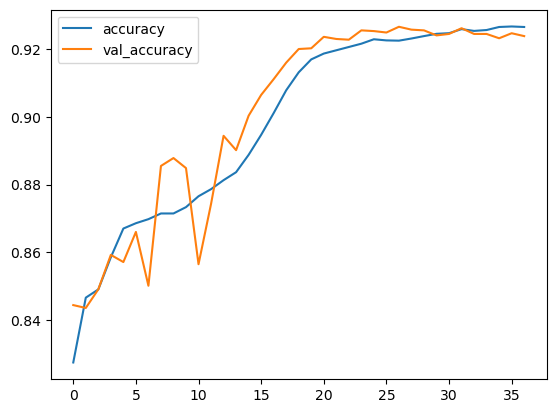

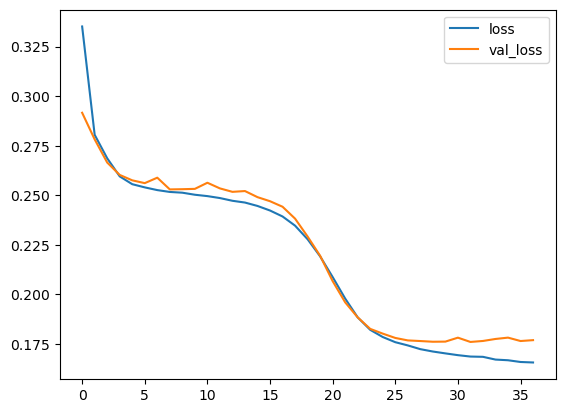

In [66]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

Our functional model also seem to have exploding gradient. We will do the same treatment as sequential improvement for functional model.

## Improvement model Functional

In [67]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In this part the functional model will be improved by adding **batch normalization** to get rid of exploding and **dropout** to potentially reduce overfitting. We will also **reduce the hidden layer** to simplify the model.

In [68]:
# Create Functional Model

input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(30, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
batchnormalization1 = tf.keras.layers.BatchNormalization()(hidden_layer_1)
dropout_1 = tf.keras.layers.Dropout(0.1)(batchnormalization1)

hidden_layer_2 = Dense(20, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(dropout_1)
batchnormalization2 = tf.keras.layers.BatchNormalization()(hidden_layer_2)
dropout_2 = tf.keras.layers.Dropout(0.1)(batchnormalization2)

concat_layer = concatenate([input_layer, dropout_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional_2 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional_2.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional_2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           1320        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 30)          120         ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 dropout (Dropout)              (None, 30)           0           ['batch_normalization[0][0]']

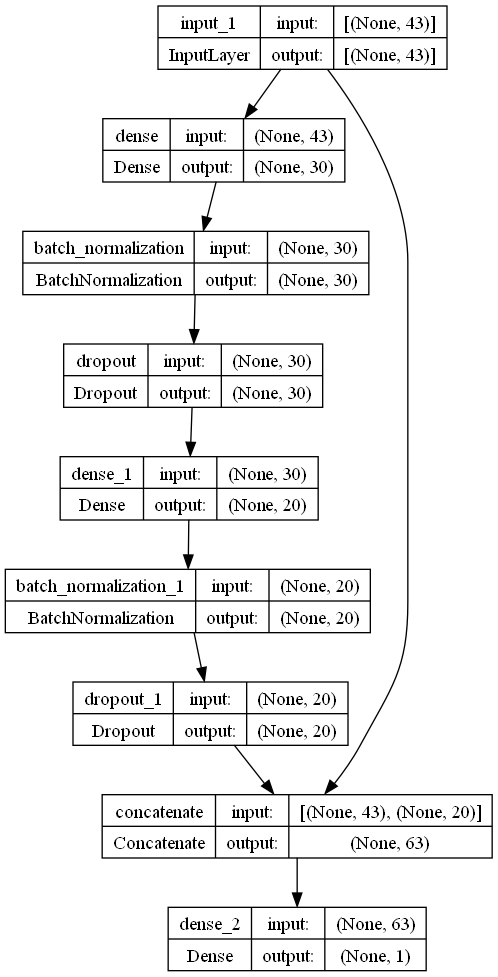

In [69]:
# Plot Layers

tf.keras.utils.plot_model(model_functional_2, show_shapes=True)

In [70]:
# Train the Model

%time
history_func_2 = model_functional_2.fit(train_pipe,
                                   epochs=150,
                                   validation_data=(val_pipe),
                                   callbacks=callback)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/150
836/836 [==============================] - 6s 4ms/step - loss: 0.3529 - accuracy: 0.8330 - val_loss: 0.2986 - val_accuracy: 0.8450
Epoch 2/150
836/836 [==============================] - 3s 4ms/step - loss: 0.3119 - accuracy: 0.8504 - val_loss: 0.2901 - val_accuracy: 0.8457
Epoch 3/150
836/836 [==============================] - 3s 4ms/step - loss: 0.3027 - accuracy: 0.8513 - val_loss: 0.2855 - val_accuracy: 0.8469
Epoch 4/150
836/836 [==============================] - 3s 4ms/step - loss: 0.2972 - accuracy: 0.8517 - val_loss: 0.2822 - val_accuracy: 0.8452
Epoch 5/150
836/836 [==============================] - 3s 4ms/step - loss: 0.2922 - accuracy: 0.8514 - val_loss: 0.2771 - val_accuracy: 0.8457
Epoch 6/150
836/836 [==============================] - 3s 4ms/step - loss: 0.2844 - accuracy: 0.8543 - val_loss: 0.2715 - val_accuracy: 0.8527
Epoch 7/150
836/836 [==============================] - 3s 4ms/step - loss: 0.2785 - accuracy: 0.8599 - 

In [71]:
# Create DataFrame

history_func_2_df = pd.DataFrame(history_func_2.history)
history_func_2_df.tail()

,loss,accuracy,val_loss,val_accuracy
38,0.195740,0.921350,0.184198,0.925588
39,0.194548,0.922585,0.186828,0.923680
40,0.194060,0.921687,0.183864,0.926012
41,0.193762,0.922996,0.188307,0.924528
42,0.194808,0.921500,0.190772,0.920712


<Axes: >

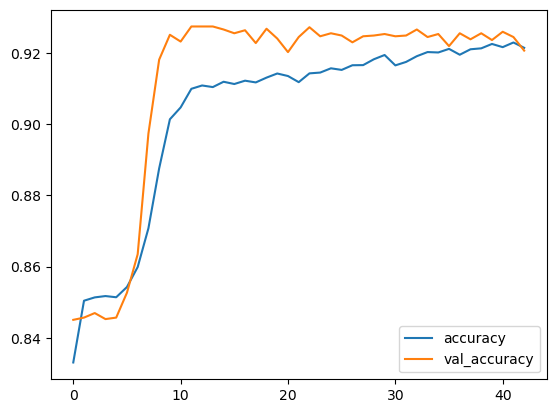

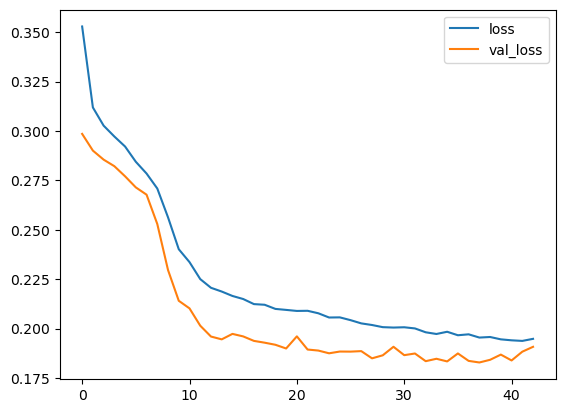

In [72]:
# Plot Training Results

history_func_2_df[['accuracy', 'val_accuracy']].plot()
history_func_2_df[['loss', 'val_loss']].plot()

While **loss score** seems to have **gotten worse** compared to previous model, we have **gotten rid of the exploding**. **Accuracy score doesn't seem to change much** and the train-validation set seems **good-fit**

# 8. Model Evaluation

Model will be evaluated on test dataset with classification report and confusion matrix. We will be focusing on recall metrics because we want to minimize false negatives. Minimizing false negatives in the context of predicting churn is about accurately identifying customers who are likely to churn, enabling businesses to take proactive measures to retain them and mitigate customer attrition.

## Model Sequential

In [73]:
# Model Evaluation of test-set

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

174/174 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2547
           1       0.92      0.95      0.93      3002

    accuracy                           0.93      5549
   macro avg       0.93      0.92      0.93      5549
weighted avg       0.93      0.93      0.93      5549



<Axes: >

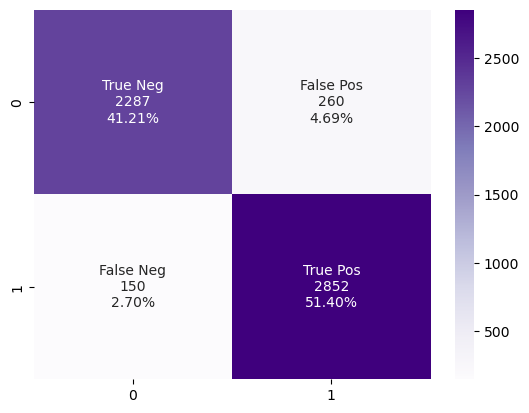

In [74]:
# Evaluasi dengan confusion matrix
confusion = confusion_matrix(y_test, y_pred_seq)
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in confusion.flatten()]
percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion,annot = labels,cmap = 'Purples',fmt ='')

The firs sequential model has recall value of 0.95 on class 1, indicating that 95% of the actual class 1 samples or customer that churn are correctly identified. From the confusion matrix we can see that 2.7% of prediction are false negatives.

## Improved Sequential

In [75]:
# Model Evaluation of test-set

y_pred_seq_2 = model_sequential_2.predict(X_test)
y_pred_seq_2 = np.where(y_pred_seq_2 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq_2))

174/174 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2547
           1       0.91      0.96      0.93      3002

    accuracy                           0.93      5549
   macro avg       0.93      0.92      0.93      5549
weighted avg       0.93      0.93      0.93      5549



<Axes: >

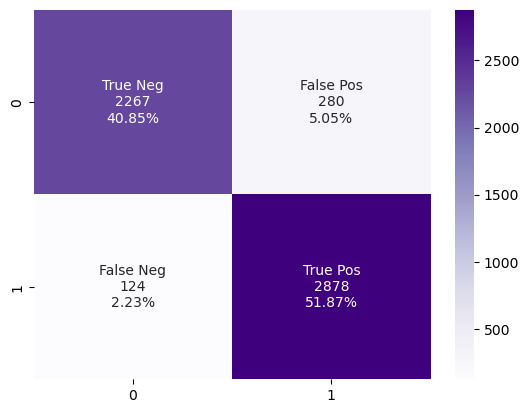

In [76]:
# Evaluasi with confusion matrix
confusion = confusion_matrix(y_test, y_pred_seq_2)
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in confusion.flatten()]
percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion,annot = labels,cmap = 'Purples',fmt ='')

The improved sequential model has recall value of 0.96 on class 1, indicating that 96% of the actual class 1 samples or customer that churn are correctly identified. From the confusion matrix we can see that 2.23% of prediction are false negatives. This means the improved model performed better than the previous model.

## Model Functional

In [77]:
# Model Evaluation of test-set

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2547
           1       0.92      0.95      0.93      3002

    accuracy                           0.93      5549
   macro avg       0.93      0.92      0.93      5549
weighted avg       0.93      0.93      0.93      5549



<Axes: >

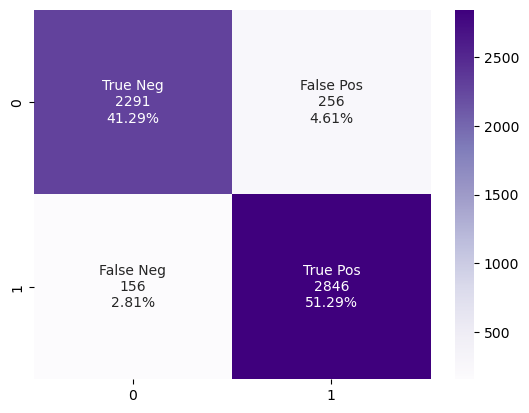

In [78]:
# Evaluasi with confusion matrix
confusion = confusion_matrix(y_test, y_pred_func)
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in confusion.flatten()]
percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion,annot = labels,cmap = 'Purples',fmt ='')

The functional model has recall value of 0.95 on class 1, indicating that 95% of the actual class 1 samples or customer that churn are correctly identified. From the confusion matrix we can see that 2.81% of prediction are false negatives.

## Improved Functional

In [79]:
# Model Evaluation of test-set

y_pred_func_2 = model_functional_2.predict(X_test)
y_pred_func_2 = np.where(y_pred_func_2 >= 0.4, 1, 0)

print(classification_report(y_test, y_pred_func_2))

174/174 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      2547
           1       0.88      0.98      0.93      3002

    accuracy                           0.92      5549
   macro avg       0.93      0.91      0.92      5549
weighted avg       0.92      0.92      0.92      5549



<Axes: >

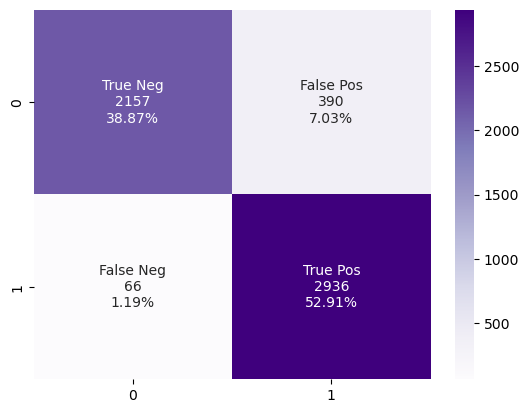

In [80]:
# Evaluasi with confusion matrix
confusion = confusion_matrix(y_test, y_pred_func_2)
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in confusion.flatten()]
percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion,annot = labels,cmap = 'Purples',fmt ='')

The improved functional model has recall value of 0.96 on class 1, indicating that 95% of the actual class 1 samples or customer that churn are correctly identified. From the confusion matrix we can see that 2.11% of prediction are false negatives.

## Best Model
Based on evaluation on test dataset all the model performed good and don't have any major difference. The improved sequential and functional model performed better that their non-improved version by a slight margin. If we want to minimize false negatives then the model that have the best performacnce is improved functional model. This model will be used for inferencing.

# 9. Model Saving

In [81]:
# Save Pipeline
import pickle

with open('preprocessor.pkl', 'wb') as file_1:
  pickle.dump(preprocessor, file_1)

In [82]:
# Freeze Model
model_sequential.trainable = False
model_sequential_2.trainable = False
model_functional.trainable = False
model_functional_2.trainable = False

In [83]:
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1320      
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,161
Trainable params: 0
Non-trainable params: 2,161
_________________________________________________________________


In [84]:
model_sequential_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1320      
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 20)                0

In [85]:
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           1320        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 20)           620         ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 10)           210         ['dense_1[0][0]']                
                                                                                              

In [86]:
model_functional_2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           1320        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 30)          120         ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 dropout (Dropout)              (None, 30)           0           ['batch_normalization[0][0]']

In [87]:
# Save ANN Model

model_sequential.save('churn_sequential.h5')
model_sequential_2.save('churn_sequential_2.h5')
model_functional.save('churn_functional.h5')
model_functional_2.save('churn_functional_2.h5')

# 10. Model Inference

Model inference was performed on the notebook [model_inference.ipynb]('h8dsft_P2M1_ali_aufa_inference.ipynb'). The model used is our improved functional ANN model because the model evaluation results are the best of all the models tested.

After doing the inference model, it can be seen that the model can make predictions. We will then deploy the model on huggingface which can be seen [here]('https://huggingface.co/spaces/aliaufa/Customer-Churn-Prediction)

# 11. Conclusion

From exploring data we found:

- The customer **churn ratio of 54%** indicates a significant challenge for the company in retaining customers. A churn rate of this magnitude suggests that more than half of the customers are discontinuing their usage of the company's products or services.

- Insights from categorical data provide valuable information for the company to focus on specific areas such as **membership categories**, **referral programs**, **personalized offers**, **mobile user experience**, **complaint resolution**, and **feedback management** to reduce churn and improve customer retention.

- Insights from numerical data shows that **customers that spent more** and **have more points** in their wallet are less likely to churn. The company can focus on improving **customer engagement and satisfaction**, as well as developing strategies to **increase transaction values and point accumulations** to reduce churn rates.

From evaluating ANN models we found:

- Our initial sequential and functional model is good with accuracy of 92% but there is exploding gradient. We improved the model by adding batch normalization and dropouts in the layer to reduce gradient exploding and reduce overfitting. We also reduce the number of hidden layer to simplify the model.

- From evaluation we can see that the improved model performs better at predicting customer that churns (True positive) and the number of false "not churn" prediction also reduced.

- Improved Functional model is chosen because it has the lowest false negative prediction. Minimizing false negatives is crucial because it helps to identify customers who are likely to churn but may be missed by the model. By correctly identifying these customers as potential churners, appropriate actions can be taken to retain them and prevent them from leaving the platform or service.

- Based on the classification report, our model shows good performance with high precision, recall, and F1-score for both classes, indicating that it is able to effectively distinguish between the two classes.

- The model performs better at predicting churn (class 1) than not churn (class 0) by a small margin.

- The overall accuracy of the model is 0.93, indicating that it correctly predicts the class for 93% of the samples

In conclusion, the analysis of the churn prediction problem revealed a significant **churn ratio of 54%**, highlighting the pressing need for the company to focus on customer retention strategies. By leveraging insights from both categorical and numerical data, the company can target specific areas such as membership categories, referral programs, personalized offers, mobile user experience, complaint resolution, and feedback management to reduce churn and improve customer satisfaction.

The evaluation of the ANN models showed that the initial model could be **improved by addressing issues of exploding gradients and overfitting**. The **improved Functional model**, with added batch normalization and dropouts, demonstrated the **best performance by minimizing false negatives**. This is crucial as it allows the company to accurately identify customers at risk of churn and take appropriate actions to retain them.

The classification report further validated the effectiveness of the model, with high precision, recall, and F1-scores for both churn and non-churn classes. The model's ability to correctly predict churn was slightly better than its ability to predict non-churn. Overall, the model achieved an **accuracy of 93%,** indicating its reliability in classifying customer churn.

By leveraging these insights and employing the improved Functional model, the company can proactively address customer churn, enhance customer satisfaction, and ultimately improve business performance. It is important for the company to continually monitor and optimize its churn prediction strategies to maintain customer loyalty and maximize customer lifetime value.

To **further improve** the churn prediction model we can do the following :

- Consider other feature engineering approach to explore new features or transformations.
- Perform different hyperparameter tuning to optimize the model's settings.
- Collect more data to increase the dataset size.
- Seek domain expertise to gain insights and refine the model.
- Regularly monitor and update the model as new data becomes available.

Implementing these strategies can enhance the model's performance and accuracy in predicting churn.

In [88]:
data2.columns.tolist()

['age',
 'gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback',
 'churn_risk_score']

In [89]:
data2.groupby(['membership_category', 'churn_risk_score'])['membership_category'].count()

membership_category  churn_risk_score
Basic Membership     0                    251
                     1                   7473
Gold Membership      0                   4282
                     1                   2513
No Membership        0                    226
                     1                   7466
Platinum Membership  0                   4338
Premium Membership   0                   4455
Silver Membership    0                   3428
                     1                   2560
Name: membership_category, dtype: int64

In [90]:
data2['complaint_status'].unique().tolist()

['No Information Available',
 'Not Applicable',
 'Unsolved',
 'Solved',
 'Solved in Follow-up']

In [50]:
from tensorflow.keras.models import load_model
with open('preprocessor.pkl', 'rb') as file_1:
  model_pipeline = pickle.load(file_1)

model_ann = load_model('churn_sequential_2.h5')

In [51]:
import shap

In [53]:
explainer = shap.Explainer(model_ann, X_train)  # 'model' refers to your trained ANN model

In [54]:
shap_values = explainer(X_test)  # 'X_test' refers to the input data for which you want to calculate SHAP values

Permutation explainer: 5550it [06:20, 14.37it/s]                          


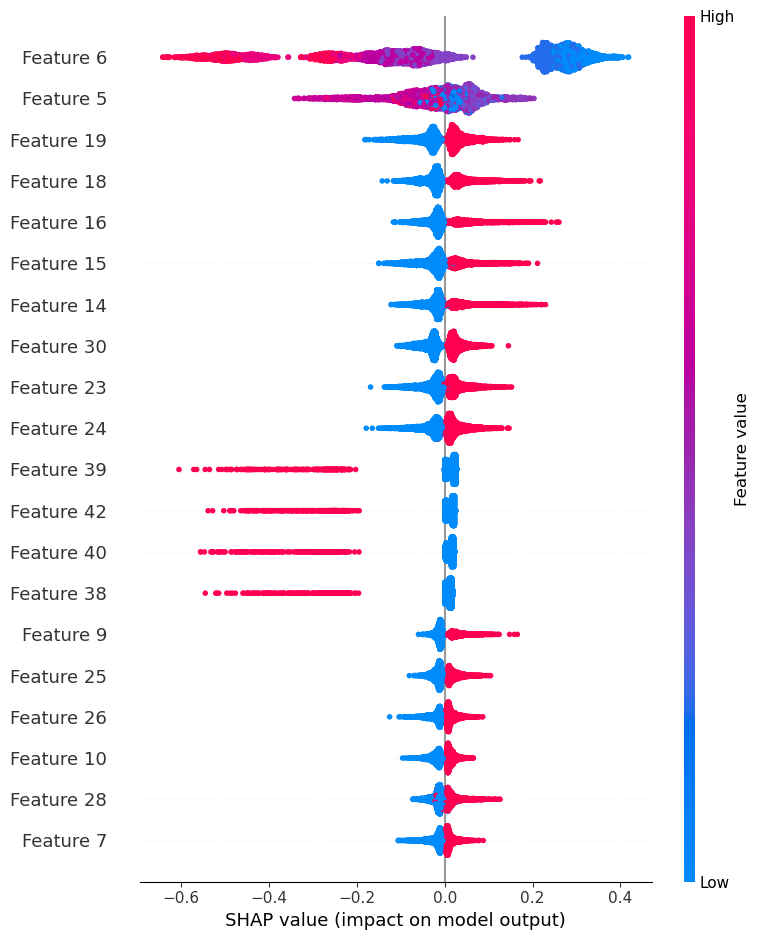

In [55]:
shap.summary_plot(shap_values, X_test)  # Visualize summary plot of SHAP values

In [57]:
X_train

array([[0.72222222, 0.64      , 0.08769434, ..., 0.        , 0.        ,
        0.        ],
       [0.38888889, 0.92      , 0.04129218, ..., 0.        , 0.        ,
        0.        ],
       [0.55555556, 0.4       , 0.12166512, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.48148148, 0.44      , 0.10578543, ..., 1.        , 0.        ,
        0.        ],
       [0.7962963 , 0.44      , 0.20151332, ..., 0.        , 0.        ,
        0.        ],
       [0.40740741, 0.84      , 0.22841258, ..., 0.        , 0.        ,
        0.        ]])

In [56]:
X_test

array([[0.09259259, 0.28      , 0.38384857, ..., 0.        , 1.        ,
        0.        ],
       [0.14814815, 0.44      , 0.04222922, ..., 0.        , 1.        ,
        0.        ],
       [0.51851852, 0.16      , 0.09887633, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.66666667, 0.56      , 0.31134676, ..., 0.        , 0.        ,
        0.        ],
       [0.81481481, 0.52      , 0.47436652, ..., 0.        , 0.        ,
        0.        ],
       [0.96296296, 0.24      , 0.29656653, ..., 0.        , 0.        ,
        0.        ]])

In [63]:
# Get numeric feature names
num_feature_names = preprocessor.transformers_[0][1]['scaler'].get_feature_names_out(num_columns)

# Get categorical ordinal feature names
cat_ord_feature_names = cat_columns_ord

# Get categorical nominal feature names
cat_nom_feature_names = preprocessor.transformers_[2][1]['encoder'].get_feature_names_out(cat_columns_nom)

# Concatenate all feature names
feature_names = list(num_feature_names) + list(cat_ord_feature_names) + list(cat_nom_feature_names)

# Print the feature names
print(feature_names)

ValueError: input_features is not equal to feature_names_in_